In [1]:
%pylab inline
import numpy as np

import pymech.neksuite as nek
from scipy.interpolate import griddata
import os
from tqdm import tqdm
from matplotlib.colors import LogNorm, SymLogNorm

import sys; sys.path.append('../../../Nek5000_run_files')
from IO import *

POD_prefix = 'midEps'

Populating the interactive namespace from numpy and matplotlib


In [2]:
def interp(field, Cx, Cy, XX, YY, method='linear', mask=None):
    """
    field - 1D array of cell values
    Cx, Cy - cell x-y values
    X, Y - meshgrid x-y values
    """
    ngrid = len(XX.flatten())
    grid_field = np.squeeze(np.reshape(griddata((Cx, Cy), field, (XX, YY), method=method), (ngrid, 1)))
    grid_field = grid_field.reshape(XX.shape)
    
    if mask is not None:
        for m in mask: grid_field[m[1],m[0]] = 0
        
    return grid_field

In [4]:
# Load 
Cx = np.load('../../../Re_17500/Cx.npy')
Cy = np.load('../../../Re_17500/Cy.npy')
mass = np.load('../../../Re_17500/mass.npy')
n = mass.size

In [5]:
nx = 400
ny = 200

# Grid for full domain
xmin = np.min(Cx)
xmax = np.max(Cx)
ymin = np.min(Cy)
ymax = np.max(Cy)
x = np.linspace(xmin,xmax,nx)
y = np.linspace(ymin,ymax,ny)
XX, YY = np.meshgrid(x, y)

wing_boundary_x, wing_boundary_y = get_wing_boundary(alpha=5, n_points=200)

In [7]:
POD_path = '../'
Phi = np.load(POD_path+POD_prefix+'_Phi.npy')
Sigma = np.load(POD_path+POD_prefix+'_Sigma.npy')
Psi = np.load(POD_path+POD_prefix+'_Psi.npy')
mean_flow = np.load(POD_path+'mean_flow.npy')
time = np.load(POD_path+'t_POD.npy')

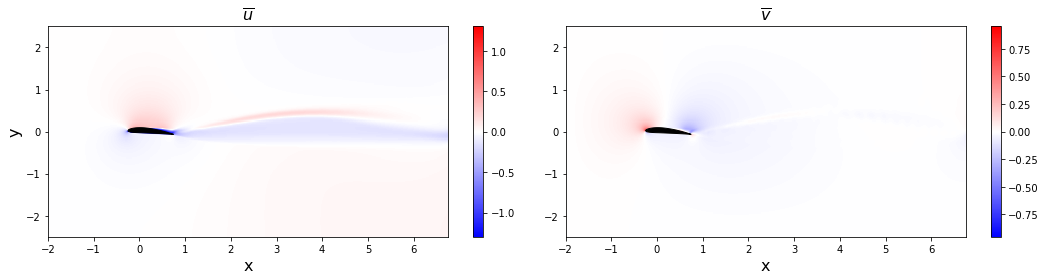

In [8]:
figure(figsize = (15,4))
label_fs = 16

mean_U_grid = interp(mean_flow[:n], Cx, Cy, XX, YY, method='linear').reshape(ny,nx)
mean_V_grid = interp(mean_flow[n:], Cx, Cy, XX, YY, method='linear').reshape(ny,nx)

subplot(1,2,1)
max_abs = np.max(np.abs(mean_U_grid-1))
pcolor(XX,YY,mean_U_grid-1, cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
xlim([np.min(x),np.max(x)])
ylim([np.min(y),np.max(y)])
colorbar()
fill(wing_boundary_x, wing_boundary_y, c='k')
title(r'$\overline{u}$', fontsize = label_fs)
xlabel('x', fontsize = label_fs)
ylabel('y', fontsize = label_fs)

subplot(1,2,2)
max_abs = np.max(np.abs(mean_V_grid))
pcolor(XX,YY,mean_V_grid, cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
xlim([np.min(x),np.max(x)])
ylim([np.min(y),np.max(y)])
colorbar()
fill(wing_boundary_x, wing_boundary_y, c='k')
title(r'$\overline{v}$', fontsize = label_fs)
xlabel('x', fontsize = label_fs)

tight_layout()

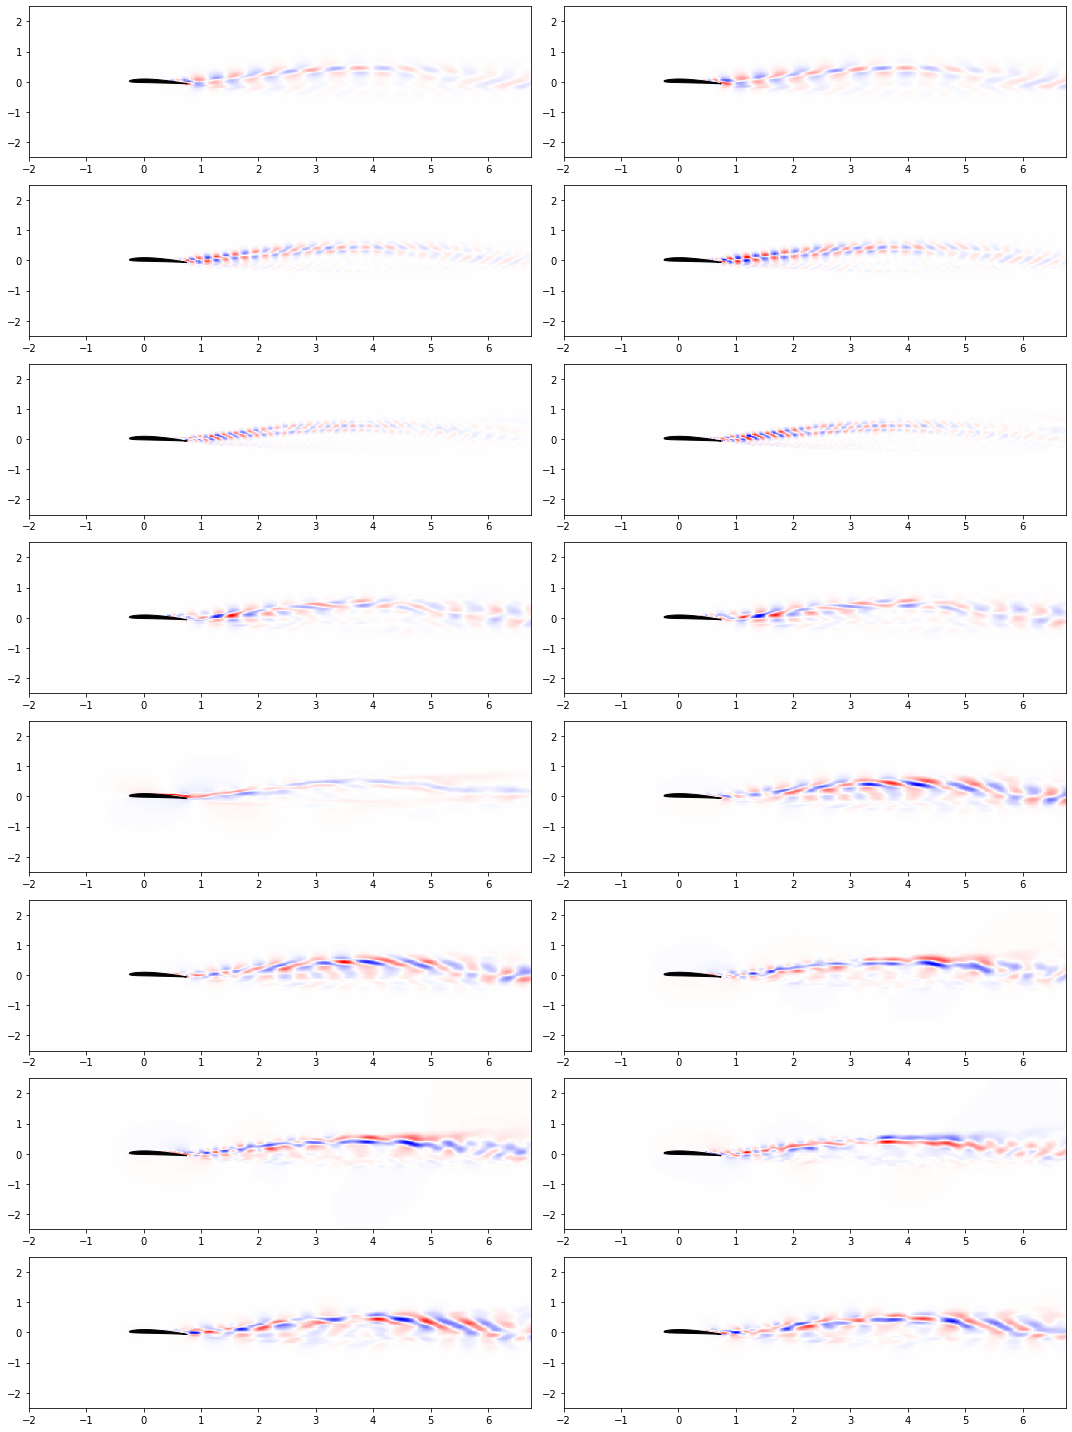

In [9]:
n_figs = 16

n_rows = int(ceil(n_figs/2))
figure(figsize = (15,2.5*n_rows))

PhiU_grid = [interp(Phi[:n,j], Cx, Cy, XX, YY, method='linear').reshape(ny,nx) for j in range(n_figs)]

for j in range(n_figs):
    
    subplot(n_rows,2,j+1)
    max_abs = np.max(np.abs(PhiU_grid[j]))
    pcolor(XX,YY,PhiU_grid[j], cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
        
tight_layout()

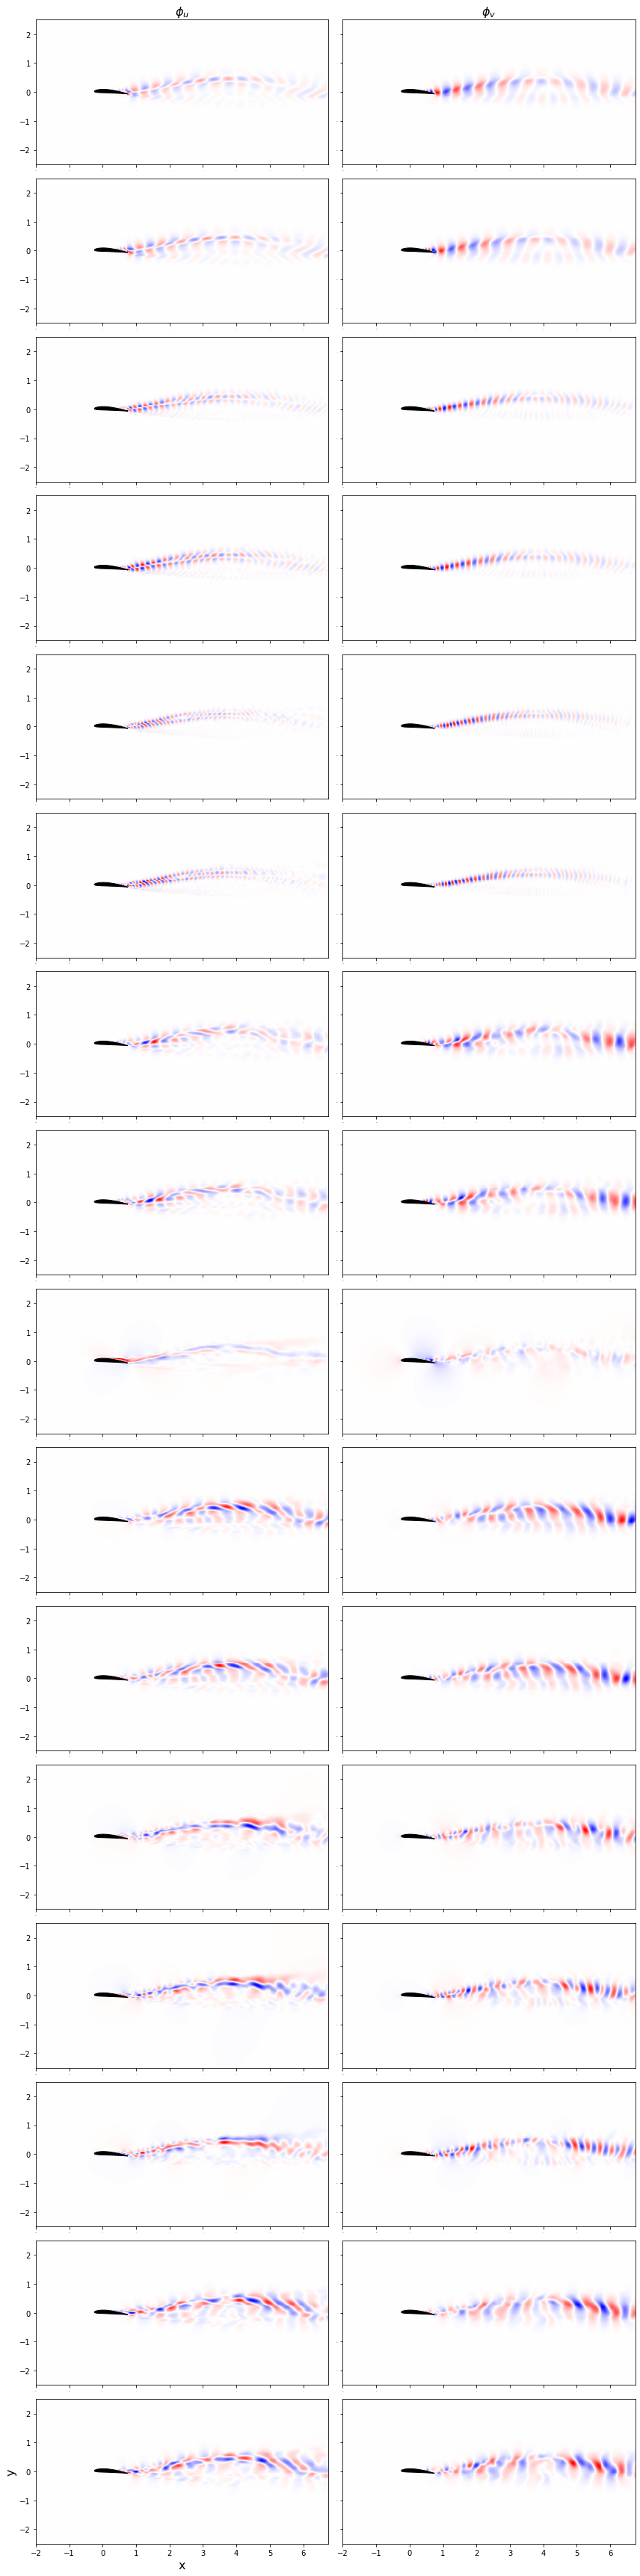

In [10]:
n_rows = 16
figure(figsize = (12,3*n_rows))

PhiU_grid = [interp(Phi[:n,j], Cx, Cy, XX, YY, method='linear').reshape(ny,nx) for j in range(n_rows)]
PhiV_grid = [interp(Phi[n:,j], Cx, Cy, XX, YY, method='linear').reshape(ny,nx) for j in range(n_rows)]

for j in range(n_rows):
    
    subplot(n_rows,2,2*j+1)
    max_abs = np.max(np.abs(PhiU_grid[j]))
    pcolor(XX,YY,PhiU_grid[j], cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
    
    if j == 0: title(r'$\phi_u$', fontsize = label_fs)
    if j == n_rows-1: 
        xlabel('x', fontsize = label_fs)
        ylabel('y', fontsize = label_fs)
    else: xticks(fontsize = 0)
    
    subplot(n_rows,2,2*j+2)
    max_abs = np.max(np.abs(PhiV_grid[j]))
    pcolor(XX,YY,PhiV_grid[j], cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
    yticks(fontsize = 0)
    
    if j == 0: title(r'$\phi_v$', fontsize = label_fs)
    if j != n_rows-1: xticks(fontsize = 0)
        
tight_layout()

[0.03720315 0.0741304  0.09722232 0.12028274 0.13115543 0.14191139
 0.15090065 0.15976761 0.16717531 0.1740302  0.18080244 0.18715213
 0.19334033 0.19951512 0.20551211 0.21121042 0.2163758  0.22141489
 0.22637738 0.2310213  0.23562137 0.2401312  0.24455463 0.24892324
 0.25312273 0.25729998 0.26123668 0.26514806 0.26899038 0.27277209
 0.27653683 0.28023698 0.28387243 0.28746692 0.29097066 0.29433858
 0.29766565 0.30096596 0.30426324 0.30747354 0.31065125 0.31378585
 0.31686272 0.31988384 0.32288205 0.32584755 0.32880599 0.33173454
 0.33462924 0.33746974 0.34027717 0.34307851 0.34585283 0.34860865
 0.3513369  0.3540281  0.35671177 0.35935828 0.3619646  0.36456305
 0.36714126 0.3696898  0.37222593 0.37473962 0.37722556 0.3797052
 0.38214174 0.38456086 0.38696205 0.38932322 0.39166755 0.39399474
 0.39630984 0.39860832 0.40090142 0.40316943 0.40541634 0.40763494
 0.40982644 0.41200028 0.41415431 0.41627815 0.41839417 0.42050491
 0.42258986 0.42465605 0.42669171 0.42871644 0.43072853 0.43272

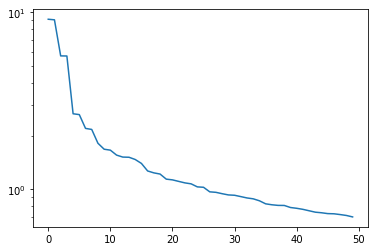

In [16]:
semilogy(Sigma[:50])
print(np.cumsum(Sigma)[:100] / np.sum(Sigma))

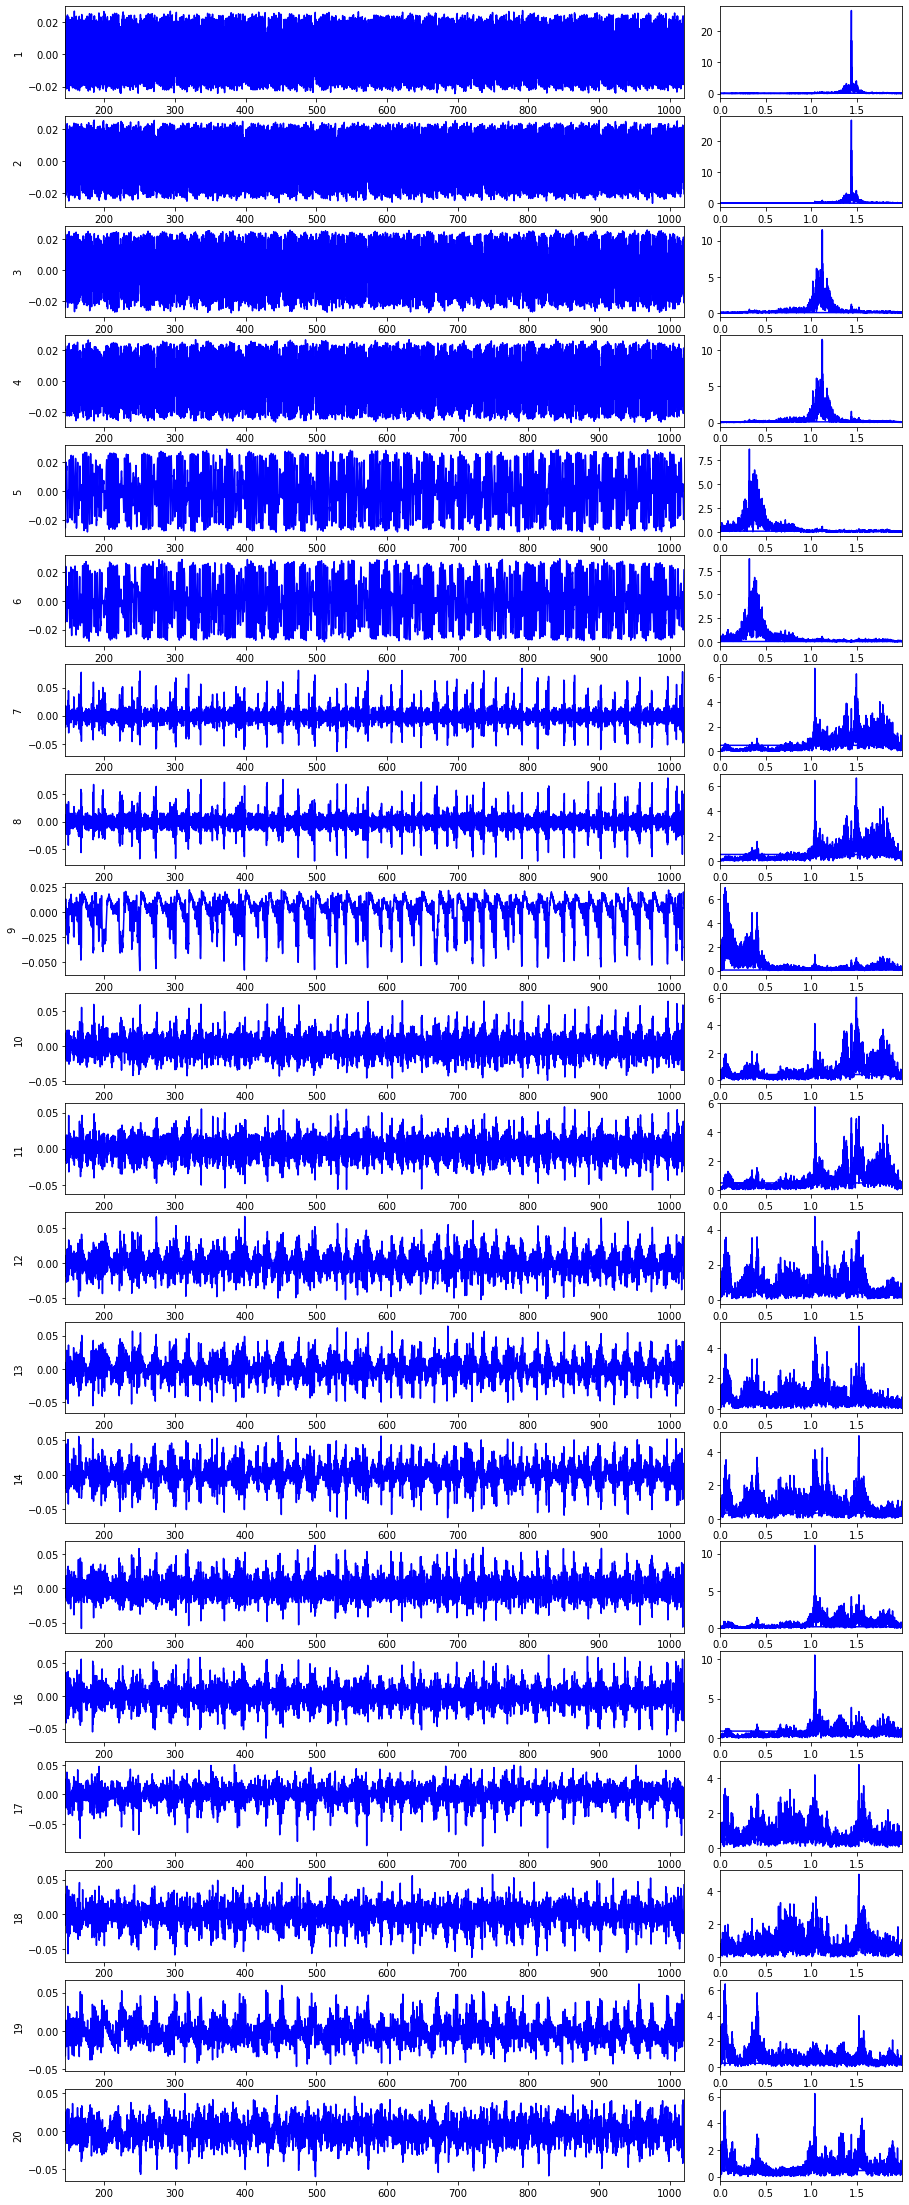

In [17]:
n_rows = 20
figure(figsize = (15,2*n_rows))
m = Psi.shape[0]

for j in range(n_rows):
    
    subplot2grid((n_rows,4),(j,0),rowspan=1, colspan=3)
    plot(time, Psi[:,j], 'b')
    xlim([time[500], time[-1]])
    ylabel(str(j+1))
#     xlim([100,120])
    
    subplot2grid((n_rows,4),(j,3),rowspan=1, colspan=1)
    F_Psi_j = np.fft.fft(Psi[:,j] - np.mean(Psi[:,j]))
    freqs = np.fft.fftfreq(m, d=time[1]-time[0])
    plot(freqs, np.abs(F_Psi_j), 'b')
    xlim([0,np.max(freqs)])

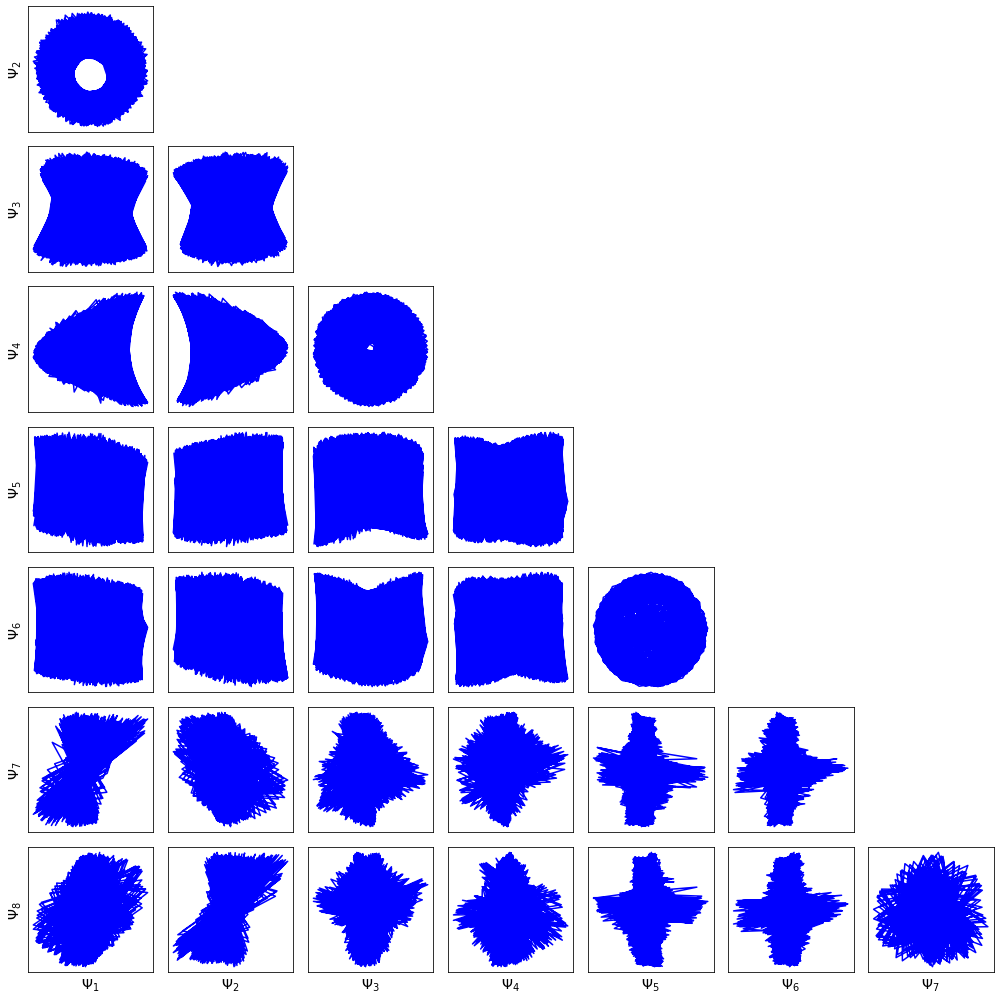

In [18]:
n_rows = 7
subfig_size = 2
label_fs = 14

figure(figsize = (subfig_size*n_rows, subfig_size*n_rows))

for i in range(n_rows+1):
    for j in range(i):
        subplot2grid((n_rows, n_rows), (i-1,j), rowspan=1, colspan=1)
        plot(Psi[:,i], Psi[:,j], 'b')
        xticks([])
        yticks([])
        
        if j == 0: ylabel(r'$\Psi_'+str(i+1)+'$', fontsize = label_fs)
        if i == n_rows: xlabel(r'$\Psi_'+str(j+1)+'$', fontsize = label_fs)

tight_layout()

In [21]:
def get_uv(file_num):
    
    file = '../../../Re_17500/outfiles/'+'airfoil0.f{0:05d}'.format(file_num)
    field = nek.readnek(file)
    
    t = field.time
    nel = len(field.elem) # Number of spectral elements
    nGLL = field.elem[0].vel.shape[3] # Order of the spectral mesh
    n = nel*nGLL**2

    u = np.array([field.elem[i].vel[0, 0, j, k]
               for i in range(nel) for j in range(nGLL) for k in range(nGLL)])
    v = np.array([field.elem[i].vel[1, 0, j, k]
               for i in range(nel) for j in range(nGLL) for k in range(nGLL)])
    
    return u,v

I/O error (2): No such file or directory


AttributeError: 'int' object has no attribute 'time'

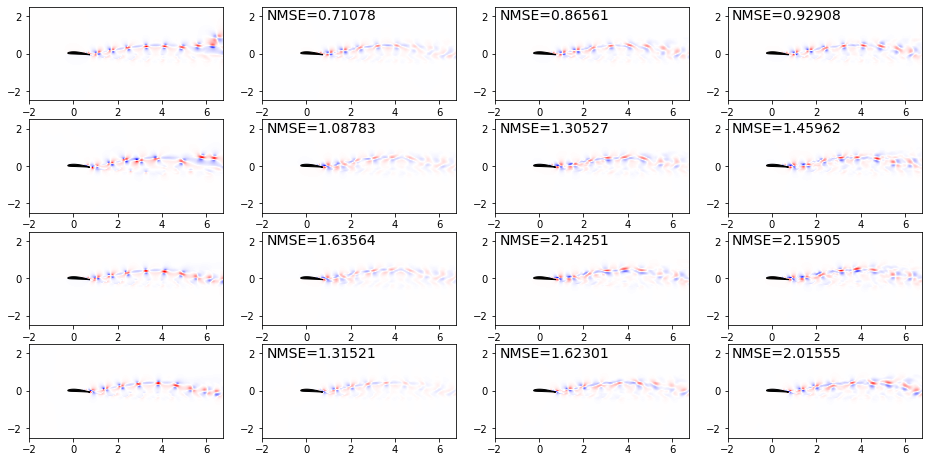

In [22]:
n_rows = 5
time_inds = np.arange(n_rows)*int((len(time)-1)/(n_rows-1))
ranks = [10,25,100]
n_cols = len(ranks)+1

figure(figsize = (16,2*n_rows))

for j in range(n_rows):
    
    ind = time_inds[j]
    
    # Get full data from nek output file, subtract mean, and interpolate to regular grid
    u_full, v_full = get_uv(ind + 201) # POD skips 200 files for transient
    u_full = u_full - mean_flow[:n,0]
    u_full_grid = interp(u_full, Cx, Cy, XX, YY, method='linear').reshape(ny,nx)
    
    # Plot full data
    subplot(n_rows, n_cols, j*n_cols+1)
    max_abs = np.max(np.abs(u_full_grid))
    pcolor(XX,YY,u_full_grid, cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
    
    # Get reconstructions
    for i in range(len(ranks)):
        
        r = ranks[i]
        
        # Get POD reconstruction
        ur = np.multiply(Phi[:n,:r], Sigma[:r]) @ Psi[ind,:r].reshape(r,1)
        ur_grid = interp(ur, Cx, Cy, XX, YY, method='linear').reshape(ny,nx)
        
        subplot(n_rows, n_cols, j*n_cols+i+2)
        pcolor(XX,YY,ur_grid, cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
        fill(wing_boundary_x, wing_boundary_y, c='k')
        xlim([np.min(x),np.max(x)])
        ylim([np.min(y),np.max(y)])
        
        residual = u_full-ur.flatten()
        square_error = np.linalg.norm(np.multiply(u_full-ur.flatten(), np.sqrt(mass)))**2
        normalized_square_error = square_error / np.linalg.norm(np.multiply(u_full, np.sqrt(mass)))**2
        
        text(-1.8,1.8,
             'NMSE='+str(np.round(normalized_square_error,5)), 
             fontsize = 14)